In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np

In [14]:
##### TO CREATE A SERIES OF PICTURES
 
def make_views(ax,angles,elevation=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.jpeg'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files,output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    print command[output_ext]
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])
 
 
 
def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)
     
    for f in files:
        os.remove(f)
     
 
##### EXAMPLE
 
if __name__ == '__main__':
 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y, Z = axes3d.get_test_data(0.05)
    s = ax.plot_surface(X, Y, Z, cmap=cm.jet)
    plt.axis('off') # remove axes for visual appeal
     
    angles = np.linspace(0,360,21)[:-1] # Take 20 angles between 0 and 360
 
    # create an animated gif (20ms between frames)
    rotanimate(ax, angles,'movie.gif',delay=20) 
 
    # create a movie with 10 frames per seconds and 'quality' 2000
    rotanimate(ax, angles,'movie.mp4',fps=10,bitrate=2000)
 
    # create an ogv movie
    rotanimate(ax, angles, 'movie.ogv',fps=10) 

mencoder "mf://tmprot_000.jpeg,tmprot_001.jpeg,tmprot_002.jpeg,tmprot_003.jpeg,tmprot_004.jpeg,tmprot_005.jpeg,tmprot_006.jpeg,tmprot_007.jpeg,tmprot_008.jpeg,tmprot_009.jpeg,tmprot_010.jpeg,tmprot_011.jpeg,tmprot_012.jpeg,tmprot_013.jpeg,tmprot_014.jpeg,tmprot_015.jpeg,tmprot_016.jpeg,tmprot_017.jpeg,tmprot_018.jpeg,tmprot_019.jpeg" -mf fps=10 -o movie.mp4 -ovc lavc                         -lavcopts vcodec=msmpeg4v2:vbitrate=2000
mencoder "mf://tmprot_000.jpeg,tmprot_001.jpeg,tmprot_002.jpeg,tmprot_003.jpeg,tmprot_004.jpeg,tmprot_005.jpeg,tmprot_006.jpeg,tmprot_007.jpeg,tmprot_008.jpeg,tmprot_009.jpeg,tmprot_010.jpeg,tmprot_011.jpeg,tmprot_012.jpeg,tmprot_013.jpeg,tmprot_014.jpeg,tmprot_015.jpeg,tmprot_016.jpeg,tmprot_017.jpeg,tmprot_018.jpeg,tmprot_019.jpeg" -mf fps=10 -o movie.mp4 -ovc lavc                         -lavcopts vcodec=msmpeg4v2:vbitrate=1800; ffmpeg -i movie.mp4 -r 10 movie.ogv


In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
s = ax.plot_surface(X, Y, Z, cmap=cm.jet)
plt.axis('off') # remove axes for visual appeal

angles = np.linspace(0,360,21)[:-1] # Take 20 angles between 0 and 360

# create an animated gif (20ms between frames)
rotanimate(ax, angles,'movie.gif',delay=20) 


# create a movie with 10 frames per seconds and 'quality' 2000
# rotanimate(ax, angles,'movie.mp4',fps=10,bitrate=2000)

# create an ogv movie
# rotanimate(ax, angles, 'movie.ogv',fps=10) 

fig size: 72.0 DPI, size in inches [ 6.  4.]


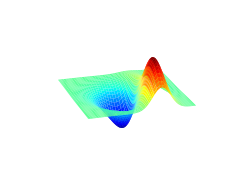

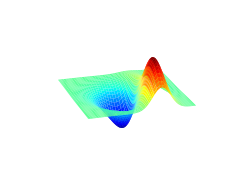

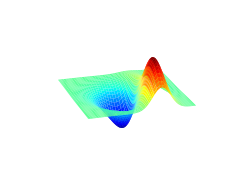

timestep 0


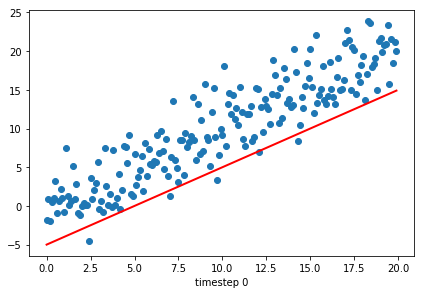

In [16]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
